In [8]:
#More reliable to not use GPU here. It's only doing inference with a small net, doesn't take long:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ''

from behaveml.io import get_sample_data
from behaveml import interpolate_lowconf_points, distance_feature_maker, velocity_feature_maker

from behaveml.unsupervised import cluster_behaviors, compute_watershed
from behaveml.plot import create_sample_videos, create_mosaic_video, create_ethogram_video,plot_embedding, plot_unsupervised_results

In [21]:
#Metadata is a dictionary that attaches each of the above parameters to the video/behavior annotations
dataset = get_sample_data()

In [22]:

#Filter out low-confidence DLC tracks and interpolate those points instead
print("Interpolating low-confidence tracking points")
interpolate_lowconf_points(dataset)

print("Calculating distance features")
dataset.add_features(distance_feature_maker, 
                    featureset_name = 'distances', 
                    add_to_features = True)

print("Calculating speed features")
dataset.add_features(velocity_feature_maker, 
                     featureset_name = 'speed', 
                     add_to_features = True);



Interpolating low-confidence tracking points
processing /home/blansdel/projects/behaveml/behaveml/data/dlc/e3v813a-20210610T120637-121213DLC_dlcrnetms5_pilot_studySep24shuffle1_100000_el_filtered.csv
processing /home/blansdel/projects/behaveml/behaveml/data/dlc/e3v813a-20210610T121558-122141DLC_dlcrnetms5_pilot_studySep24shuffle1_100000_el_filtered.csv
processing /home/blansdel/projects/behaveml/behaveml/data/dlc/e3v813a-20210610T122332-122642DLC_dlcrnetms5_pilot_studySep24shuffle1_100000_el_filtered.csv
processing /home/blansdel/projects/behaveml/behaveml/data/dlc/e3v813a-20210610T122758-123309DLC_dlcrnetms5_pilot_studySep24shuffle1_100000_el_filtered.csv
processing /home/blansdel/projects/behaveml/behaveml/data/dlc/e3v813a-20210610T123521-124106DLC_dlcrnetms5_pilot_studySep24shuffle1_100000_el_filtered.csv
Calculating distance features
['adult_x_nose', 'adult_x_leftear', 'adult_x_rightear', 'adult_x_neck', 'adult_x_lefthip', 'adult_x_righthip', 'adult_x_tail', 'adult_y_nose', 'adult_

In [23]:
#Get distance and speed columns, for each animal separately
speed_cols = dataset.get_columns_regex('speed__(.*)')
dist_cols = dataset.get_columns_regex('distances__(.*)')
target_cols = speed_cols + dist_cols

#But exclude these
juvenile_cols = dataset.get_columns_regex('juvenile(.*)')
inter_cols = dataset.get_columns_regex('M0_M1(.*)')
adult_cols = [i for i in target_cols if (i not in juvenile_cols) and (i not in inter_cols)]
adult_cols

['speed__adult_speed_nose_leftear',
 'speed__adult_speed_nose_rightear',
 'speed__adult_speed_nose_neck',
 'speed__adult_speed_nose_lefthip',
 'speed__adult_speed_nose_righthip',
 'speed__adult_speed_nose_tail',
 'speed__adult_speed_leftear_rightear',
 'speed__adult_speed_leftear_neck',
 'speed__adult_speed_leftear_lefthip',
 'speed__adult_speed_leftear_righthip',
 'speed__adult_speed_leftear_tail',
 'speed__adult_speed_rightear_neck',
 'speed__adult_speed_rightear_lefthip',
 'speed__adult_speed_rightear_righthip',
 'speed__adult_speed_rightear_tail',
 'speed__adult_speed_neck_lefthip',
 'speed__adult_speed_neck_righthip',
 'speed__adult_speed_neck_tail',
 'speed__adult_speed_lefthip_righthip',
 'speed__adult_speed_lefthip_tail',
 'speed__adult_speed_righthip_tail',
 'distances__adult_dist_nose_leftear',
 'distances__adult_dist_nose_rightear',
 'distances__adult_dist_nose_neck',
 'distances__adult_dist_nose_lefthip',
 'distances__adult_dist_nose_righthip',
 'distances__adult_dist_nose_

42

In [26]:
#This will take up to half an hour to run, for the full 80 videos.
cluster_results = cluster_behaviors(dataset, adult_cols)
dens_matrix, labels, embedding_extent = cluster_results

Performing dimensionality reduction
Computing density estimate of embedding
Fitting KDE
Computing grid of densities


/opt/conda/envs/DEEPLABCUT/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


Performing watershed transform of density


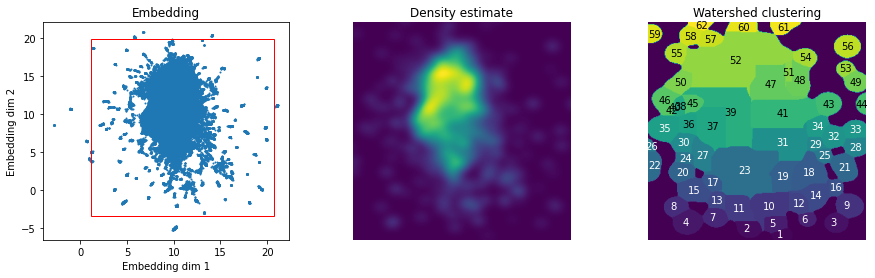

In [27]:
plot_unsupervised_results(dataset, cluster_results);

In [ ]:
create_ethogram_video(dataset, './all_videos/e3v813a-20220114T125740-130257DLC_dlcrnetms5_pilot_studySep24shuffle1_100000_el_filtered.csv', 'unsup_behavior_label', 'test_ethogram_dist+vel_features.avi')
#create_ethogram_video(dataset, './all_videos/e3v813a-20220114T125740-130257DLC_dlcrnetms5_pilot_studySep24shuffle1_100000_el_filtered.csv', 'test_control_repeat_diff_behavior_label', 'test_ethogram_repeat_testgroup_testenriched.avi')


In [ ]:
out_dir = '/home/blansdel/projects/behaveml/examples/unsupervised_behav_clustering_videos_umap_fulldataset_distvelfeatures/'
video_dir = '/home/blansdel/projects/brett_dlc/animal_pilot/all_videos/'

create_sample_videos(dataset, video_dir, out_dir)